In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.pipeline import Pipeline
import missingno as msno
import plotly.express as px

In [3]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/diamond_pricing.csv'
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [4]:
print(df.columns.tolist())

['Paleonium', 'Pressure', 'Price']


In [5]:
px.scatter_3d(df, x='Paleonium', y='Pressure', z='Price', color='Price')

In [6]:
X = df.drop(columns=['Price'])
y = df['Price']

In [7]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor())])

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
model.fit(Xtrain, ytrain)

print('Decision Tree Regressor')
print(f'Train Score: {model.score(Xtrain, ytrain)}')
print(f'Test Score: {model.score(Xtest, ytest):.2f} ')


Decision Tree Regressor
Train Score: 1.0
Test Score: 0.94 


In [9]:
print("Metics")
ypred = model.predict(Xtest)
print(f'MAE: {m.mean_absolute_error(ytest, ypred):.2f}')
print(f'MSE: {m.mean_squared_error(ytest, ypred):.2f}')
print(f'R2: {m.r2_score(ytest, ypred):.2f}')

Metics
MAE: 112.64
MSE: 26647.31
R2: 0.94


visualize the tree model

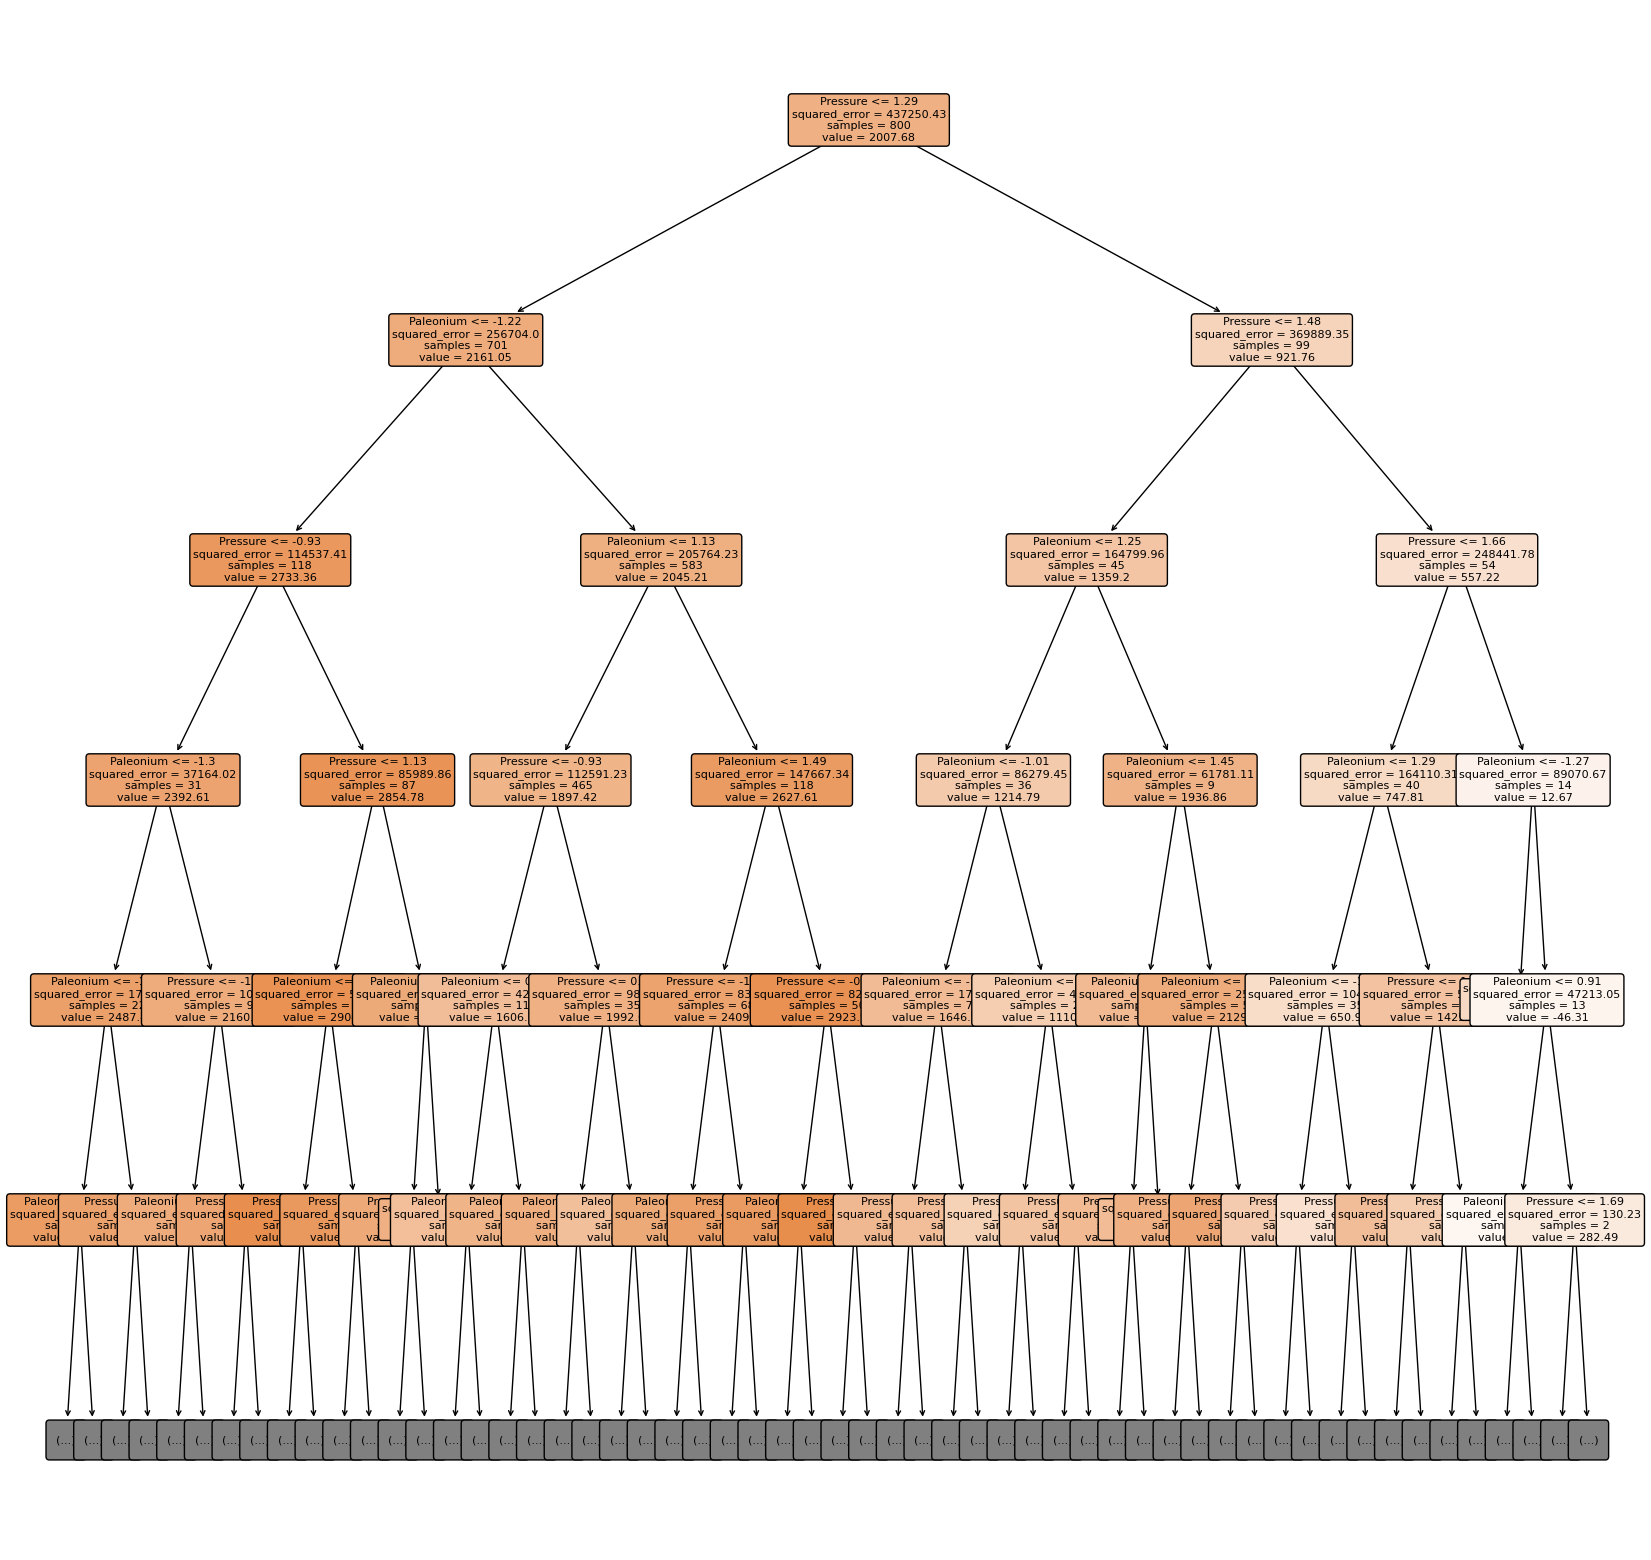

In [10]:
plt.figure(figsize=(20, 20))
plot_tree(
    model.named_steps['regressor'],
    max_depth=5,
    feature_names=X.columns.tolist(),
    class_names=['Price'],
    filled=True,
    rounded=True,
    fontsize=8,
    precision=2)
plt.show()

In [11]:
from joblib import dump
dump(model, 'diamond_pricing.joblib')

['diamond_pricing.joblib']

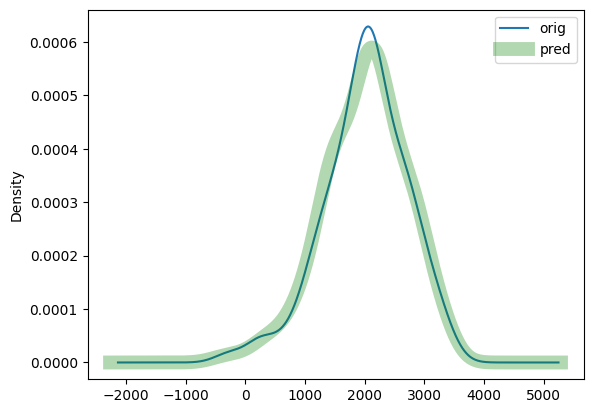

In [42]:
ypred = model.predict(Xtest)
evaldf = pd.DataFrame([ytest, ypred], index=['orig','pred']).T
ax = evaldf.plot(kind='kde', y='orig')
evaldf.plot(kind='kde', y='pred', linewidth=10, alpha=.3, style='g', ax=ax)
plt.show()
